**Lecturer**

Set up MATLAB

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/03/3/matlab'


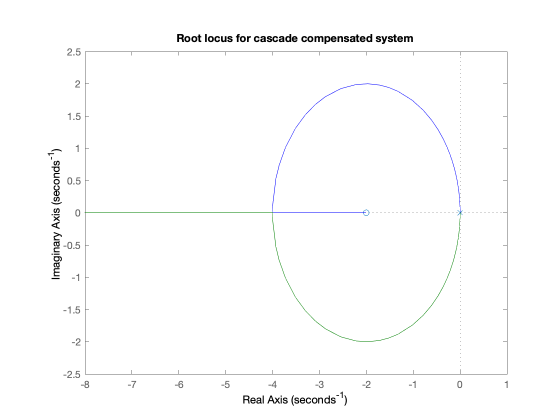

In [12]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

# Proportional Plus Derivative Compensation

## Introduction

First design example (Satellite Attitude Control). 

Plant:  $$G(s) = \frac{1}{s^2}$$

Feedback: 

$$H(s) = 1$$

With velocity feedback the system is as shown in Figure 1.

![Figure 1 Satellite Attitude Control with Velocity Feedback](images/fig1.png)
**Figure 1 Satellite Attitude Control with Velocity Feedback**

For this system, the root locus equation is

$$1+\frac{KK_T \left(s+\frac{1}{K_T }\right)}{s^2 }$$

and the design parameters where calculated to be

In [13]:
Kt = 0.5; K = 8;

The closed-loop characteristic equation is

In [14]:
clce1 = [1, K*Kt, K];

The closed-loop transfer function is then:

In [15]:
Gc1 = tf(K,clce1)


Gc1 =
 
        8
  -------------
  s^2 + 4 s + 8
 
Continuous-time transfer function.



In this document we illustrate how we may implement a silimilar control 
law using cascade compensation.

## Cascade compensator

An alternative compensation architecture is the cascade compensator illustrated in Figure 2.

![Figure 2 The cascade compensator](images/pd.png)
**Figure 2 The cascade compensator**

The compensator is in series with the plant so that, in general, if the compensator transfer function is

$$D(s)=\frac{K_c(s+z_1)\ldots(s+z_r)}{(s+p_1)\ldots(s+p_q)}$$
	 
and the compensator poles and zeros are simply added to the poles and zeros of the plant. 

If we wish to achieve the same root-locus equation as the previous design (1) then the compensator must have transfer function 

$$D(s) = K_c(s + z_1)$$

where

$$K_c = K K_t = 4$$

$$z_1 = 1/K_t = 2$$
	 

Let us verify that this gives the same results as the previous example:

In [16]:
Kt = 1/2;
z1 = -1/Kt;
Go = zpk(z1,[0, 0],1) % root locus gain initially set to unity


Go =
 
  (s+2)
  -----
   s^2
 
Continuous-time zero/pole/gain model.



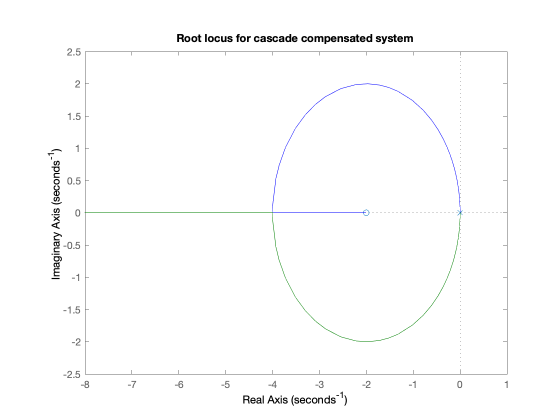

In [17]:
rlocus(Go),title('Root locus for cascade compensated system')

Find the root locus gain at the point on the root locus where the poles are located at $s=-2+j2$.

In [18]:
Kc = rlocfind(Go,-2+2j)

Kc =
     4


Now add this to the compensator

In [19]:
D = tf(Kc*[1 -z1],1)


D =
 
  4 s + 8
 
Continuous-time transfer function.



$$D(s) = 4s + 8$$

Analysis of this compensator reveals that it is of a type known as "_proportional 
plus derivative_" (P+D). The output of the compensator is of the form

$$U(s) = K_DsE(s)+K_{\mathrm{prop}}E(s)$$

$$u(t) = K_d\frac{de(t)}{dt}+K_{\mathrm{prop}}e(t)$$

and is made up of a "proportion" of the error plus a proportion of the 
rate-of-change (or derivative) of the error. It is the derivative term that 
gives the dampening effect required to allow the frictionless system to come 
to rest.

## Closed-loop response

The closed-loop tranfer function is given by 

$$G_c(s) = \frac{D(s)G(s)}{1+D(s)G(s)}$$

In [20]:
G=tf(1,[1,0,0])


G =
 
   1
  ---
  s^2
 
Continuous-time transfer function.



In [21]:
Gc2 = feedback(D*G,1)


Gc2 =
 
     4 s + 8
  -------------
  s^2 + 4 s + 8
 
Continuous-time transfer function.



Let us plot and compare the step responses of the P+D and velocity feedback 
results.

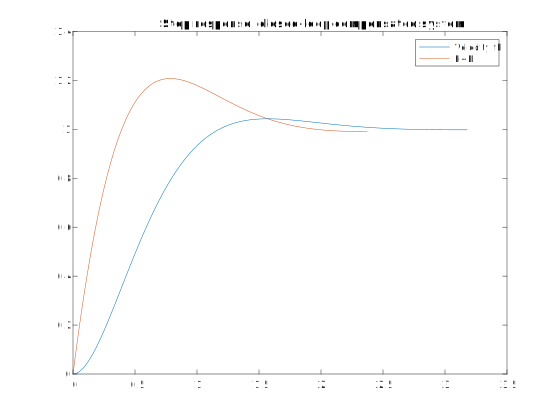

In [22]:
[y1,t1]=step(Gc1);
[y2,t2]=step(Gc2);
plot(t1,y1,t2,y2),...
 legend('Velocity fb','P+D'),...
 title('Step response: closed-loop compensated system')

## Notes

Notice that, although the settling time is about the same in both designs, 
the overshoot is considerably larger in the P+D compensated system. This is 
because the zero added by the P+D compensator appears in the numerator of the 
closed-loop transfer function. (refer back to Contact Hour 2 for an explanation).

## Resources

An executable version of this document is available to download as a MATLAB Live Script file [pplusd.mlx](matlab/pplusd.mlx).

The Simulink model of the satellite attitude control system with P+D compensation is [satellite.slx](matlab/pd.slx).